In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import h5py
import mat73
import pickle




In [17]:
mat = scipy.io.loadmat('/Users/asimadnan/Desktop/Mres/ASVspoof_2019_baseline_CM_v1/AllTrainData/CQCC_genuineFeatureCell_train.mat')


In [18]:
spoof_path = '/Users/asimadnan/Desktop/Mres/ASVspoof_2019_baseline_CM_v1/AllTrainData/CQCC_spoofFeatureCell_train.mat'

In [22]:
spoof_lens = []
for item in mat['genuineFeatureCell']:
    spoof_lens.append(item[0].shape[1])

In [23]:
print(max(spoof_lens))
print(min(spoof_lens))

1304
160


In [25]:
single = mat['genuineFeatureCell'][0]

In [26]:
single = np.array([np.array(xi) for xi in single[0]])

In [27]:
target_col = 230

In [28]:
single.shape

(90, 405)

In [29]:
single[:,:230].shape

(90, 230)

In [89]:
num_dim = single.shape[1]
max_len = 230
conv = np.concatenate((single, np.array([[0.]*num_dim]*(max_len-len(single)))), axis=0)

In [120]:
zeross = np.array([[0.]*(230-225)]*(90))

In [108]:
zeross.shape

(90, 5)

In [122]:
target_col - single.shape[1]

5

In [124]:
single[:,:5].shape

(90, 5)

In [126]:
conv_2 = np.concatenate((single, single[:,:5]), axis=1)
conv_2.shape

(90, 230)

In [115]:
conv = np.concatenate((single, zeross), axis=1)

In [116]:
pd.DataFrame(conv)

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
0,-2040.225860,-2043.201837,-2048.291655,-2035.633235,-2019.110470,-1968.566036,-1904.666343,-1846.660562,-1784.083576,-1713.416191,...,-1954.198073,-2025.585427,-2063.049698,-2073.747482,-2068.335412,0.0,0.0,0.0,0.0,0.0
1,195.947247,227.787506,265.853548,300.844465,326.533892,337.009901,345.405343,350.688056,368.887105,401.008786,...,180.743232,218.059387,216.545377,206.659501,209.461595,0.0,0.0,0.0,0.0,0.0
2,112.342251,101.136858,106.585748,105.634932,94.141791,87.501876,76.790311,63.403467,37.587592,-21.406565,...,5.600598,21.647396,59.341790,82.115041,87.938718,0.0,0.0,0.0,0.0,0.0
3,31.501098,36.457669,34.134066,13.519678,28.599789,10.303045,-2.105665,-15.476011,-39.579225,-79.521479,...,27.556592,30.297672,43.271650,35.490266,38.084552,0.0,0.0,0.0,0.0,0.0
4,23.005238,5.120485,-6.100595,-3.218435,-15.554146,-11.025642,-28.609821,-32.398327,-48.737379,-38.527064,...,26.327247,23.170588,0.079843,6.240940,16.453777,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.654430,1.079278,1.303831,1.211191,0.679539,0.144537,-0.522067,-0.878436,-0.813954,-0.514912,...,0.253783,0.451364,0.606468,0.647456,0.439308,0.0,0.0,0.0,0.0,0.0
86,-0.186407,-0.167825,-0.118377,-0.150124,-0.078066,0.002914,-0.242681,-0.460993,-0.541174,-0.484170,...,-0.060588,0.304000,0.400048,0.259766,0.052477,0.0,0.0,0.0,0.0,0.0
87,-0.135613,-0.320102,-0.564173,-0.629907,-0.516375,-0.229922,0.170495,0.440726,0.622368,0.562342,...,-0.329237,-0.223196,-0.103491,0.053382,0.153689,0.0,0.0,0.0,0.0,0.0
88,-0.007726,-0.015346,-0.032275,0.108786,0.140412,-0.312085,-0.330588,-0.356562,-0.440025,-0.570197,...,-0.361903,-0.547327,-0.440503,-0.337382,-0.127985,0.0,0.0,0.0,0.0,0.0


In [117]:
pd.DataFrame(single)

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-2040.225860,-2043.201837,-2048.291655,-2035.633235,-2019.110470,-1968.566036,-1904.666343,-1846.660562,-1784.083576,-1713.416191,...,-1906.225955,-1874.979833,-1832.652374,-1828.611640,-1878.043743,-1954.198073,-2025.585427,-2063.049698,-2073.747482,-2068.335412
1,195.947247,227.787506,265.853548,300.844465,326.533892,337.009901,345.405343,350.688056,368.887105,401.008786,...,128.599403,114.718302,77.506977,79.774657,123.950940,180.743232,218.059387,216.545377,206.659501,209.461595
2,112.342251,101.136858,106.585748,105.634932,94.141791,87.501876,76.790311,63.403467,37.587592,-21.406565,...,24.087563,6.985661,8.556438,11.672663,5.028797,5.600598,21.647396,59.341790,82.115041,87.938718
3,31.501098,36.457669,34.134066,13.519678,28.599789,10.303045,-2.105665,-15.476011,-39.579225,-79.521479,...,32.941845,32.315324,28.198955,30.953640,34.094495,27.556592,30.297672,43.271650,35.490266,38.084552
4,23.005238,5.120485,-6.100595,-3.218435,-15.554146,-11.025642,-28.609821,-32.398327,-48.737379,-38.527064,...,11.287442,11.393682,20.217693,19.613087,18.765251,26.327247,23.170588,0.079843,6.240940,16.453777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.654430,1.079278,1.303831,1.211191,0.679539,0.144537,-0.522067,-0.878436,-0.813954,-0.514912,...,-0.955971,-0.805077,-0.758855,-0.518915,-0.190081,0.253783,0.451364,0.606468,0.647456,0.439308
86,-0.186407,-0.167825,-0.118377,-0.150124,-0.078066,0.002914,-0.242681,-0.460993,-0.541174,-0.484170,...,0.594815,-0.115034,-0.649083,-0.854409,-0.552715,-0.060588,0.304000,0.400048,0.259766,0.052477
87,-0.135613,-0.320102,-0.564173,-0.629907,-0.516375,-0.229922,0.170495,0.440726,0.622368,0.562342,...,0.192245,0.093381,-0.125225,-0.177027,-0.275463,-0.329237,-0.223196,-0.103491,0.053382,0.153689
88,-0.007726,-0.015346,-0.032275,0.108786,0.140412,-0.312085,-0.330588,-0.356562,-0.440025,-0.570197,...,0.850611,1.199224,1.224728,0.738485,0.092029,-0.361903,-0.547327,-0.440503,-0.337382,-0.127985


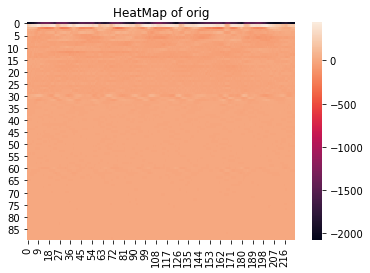

In [118]:
plt_heatmap(single,'orig')

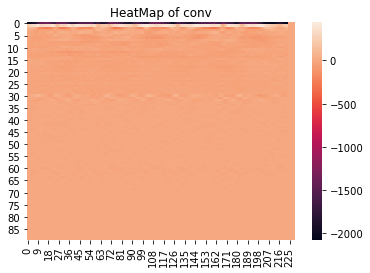

In [119]:
plt_heatmap(conv,'conv')

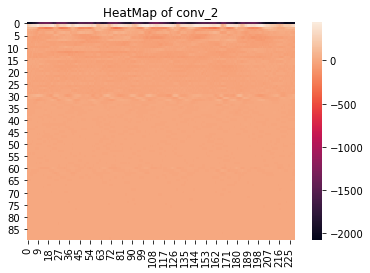

In [127]:

plt_heatmap(conv_2,'conv_2')

In [69]:
len(mat['genuineFeatureCell'])

2580

In [9]:
len(mat['genuineFeatureCell'])

2580

In [86]:
index = 1

print(len(mat['genuineFeatureCell'][index][0]))
print(len(mat['genuineFeatureCell'][index][0][0]))

90
515


In [15]:
lens = []
for item in mat['genuineFeatureCell']:
    lens.append(item[0].shape[1])

In [17]:
print(max(lens))
print(min(lens))

1304
160


In [5]:
subset = mat['genuineFeatureCell'][0:10]

In [34]:
data = []
for item in subset:
    #print(len(item[0]))
    #plt_heatmap(item[0],'asa')
    ndd = np.array([np.array(xi) for xi in item[0]])
    
    data.append(ndd[:,:160])

In [35]:
for item in data:
    print(item.shape)

(90, 160)
(90, 160)
(90, 160)
(90, 160)
(90, 160)
(90, 160)
(90, 160)
(90, 160)
(90, 160)
(90, 160)


In [36]:
pd.DataFrame(data[0])


,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,-2181.205462,-2199.795225,-2218.078901,-2235.547540,-2255.604643,-2264.169787,-2259.136464,-2268.293177,-2275.814428,-2273.102040,...,-1296.360948,-1299.401124,-1314.194396,-1330.792137,-1344.785197,-1366.927578,-1373.341597,-1396.493748,-1409.441600,-1386.246754
1,53.438581,64.652722,62.418420,57.906765,59.733864,55.552708,41.660702,40.686573,41.331121,38.034400,...,316.052318,313.069655,308.598599,298.649323,284.118876,276.795781,261.726767,277.846084,293.466606,282.441391
2,46.664091,43.225705,61.325095,66.355893,66.999806,70.474673,68.136512,69.058280,61.152977,62.765540,...,-232.019651,-215.282047,-189.022963,-154.157304,-122.764832,-102.389617,-77.965434,-73.051021,-71.136260,-75.812372
3,56.043068,50.997312,40.548948,58.590031,67.156929,57.911886,66.063979,62.933076,66.192339,53.519969,...,-58.622580,-67.345847,-71.354530,-78.961438,-75.271555,-61.914141,-66.789093,-75.722517,-92.371230,-93.309450
4,35.231376,35.727620,36.543256,23.199204,17.518024,31.872114,28.936512,36.079422,35.376410,37.747146,...,-14.971280,-9.888853,-12.896304,-13.438658,-24.948231,-27.846243,-30.312668,-23.503734,-21.354849,-39.204305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.083168,0.089782,0.068429,-0.053554,-0.192184,-0.288362,-0.240670,0.026791,0.410122,0.770818,...,-0.287468,-0.088856,-0.064092,0.132228,0.434050,0.590133,0.538602,0.457878,0.301644,0.035860
86,-0.094066,-0.218469,-0.308964,-0.193215,0.022927,0.365628,0.799307,0.992630,0.830076,0.381472,...,0.226339,0.213448,0.211937,0.118675,-0.197913,-0.557527,-0.707494,-0.641912,-0.234601,0.313509
87,-0.627173,-0.702569,-0.483569,-0.125588,0.411845,0.704713,0.400400,-0.140034,-0.622778,-0.680713,...,-0.538809,-0.361288,-0.263863,-0.293193,-0.235530,-0.133855,-0.112526,0.022674,0.099164,-0.012343
88,0.654781,0.972621,0.958380,0.722200,0.151810,-0.447719,-0.631630,-0.293582,0.151919,0.297475,...,0.655578,0.115538,-0.318073,-0.602802,-0.485419,-0.208979,0.266147,0.488384,0.254763,0.031388


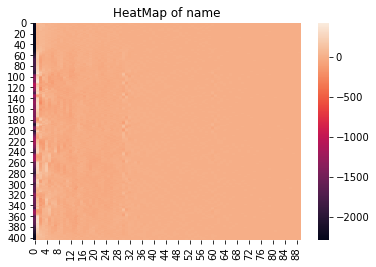

In [26]:
plt_heatmap(data[0],'name')

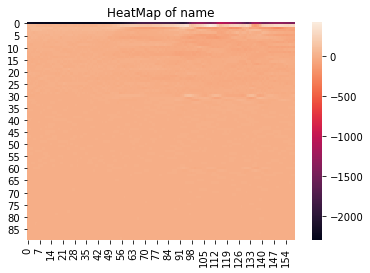

In [37]:
plt_heatmap(data[0],'name')

In [21]:
def plt_heatmap(data,name):
    ax = sns.heatmap(data)
    plt.title('HeatMap of ' + name)
    plt.show()

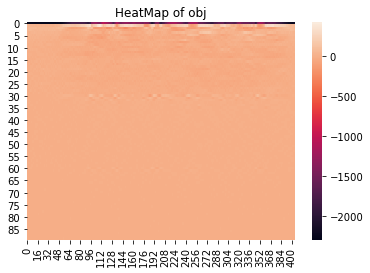

In [26]:
plt_heatmap(mat['genuineFeatureCell'][0][0],'obj')

In [38]:
gmm_bon = GMM(n_components = 5, covariance_type='diag',n_init = 50)

In [40]:
Xbon = np.vstack(data)

In [43]:
Xbon

array([[-2.18120546e+03, -2.19979522e+03, -2.21807890e+03, ...,
        -1.39649375e+03, -1.40944160e+03, -1.38624675e+03],
       [ 5.34385814e+01,  6.46527216e+01,  6.24184198e+01, ...,
         2.77846084e+02,  2.93466606e+02,  2.82441391e+02],
       [ 4.66640914e+01,  4.32257052e+01,  6.13250951e+01, ...,
        -7.30510210e+01, -7.11362599e+01, -7.58123725e+01],
       ...,
       [ 1.12529940e-01,  1.30306790e-01, -1.07826264e-03, ...,
        -1.19082754e+00, -1.04642847e+00, -9.76132968e-01],
       [-2.77185775e-01, -2.21335036e-01,  8.62830363e-02, ...,
         3.28367708e-01,  4.90390653e-01,  6.36045178e-01],
       [ 2.43506008e-01,  1.53524506e-01, -4.29393072e-02, ...,
        -2.00106525e-01, -3.72898276e-01, -2.79889443e-01]])

In [44]:
gmm_bon.fit(Xbon)

GaussianMixture(covariance_type='diag', n_components=5, n_init=50)

# From Reading Data to Fitting GMM

In [22]:
bon_path = '/Users/asimadnan/Desktop/Mres/ASVspoof_2019_baseline_CM_v1/AllTrainData/genuineFeatureCell_train.mat'
spoof_path = '/Users/asimadnan/Desktop/Mres/ASVspoof_2019_baseline_CM_v1/AllTrainData/spoofFeatureCell_train.mat'

In [23]:
bonafide_data = scipy.io.loadmat(bon_path)

In [ ]:
spoof_data = mat73.loadmat(spoof_path)


In [21]:
bon_data = []
spo_data = []
target_num_rows = 160 #minimum duration of each file in this dataset

In [84]:
for item in bonafide_data['genuineFeatureCell'][0:200]:
    feature = np.array([np.array(xi) for xi in item[0]])   
    if(target_num_rows - feature.shape[1]) > 0:
        feature = np.concatenate((feature, feature[:,:target_num_rows - feature.shape[1]]), axis=1)
    else:
        feature = feature[:,:target_num_rows]  
    bon_data.append(feature.reshape(-1))

200

In [85]:
bon_data = np.c_[ bon_data, np.array(['bonafide']*len(bon_data)) ]

AttributeError: 'list' object has no attribute 'shape'

In [63]:
#bon_data = np.vstack(bon_data)

In [69]:
bon_data.shape

(200, 14401)

In [64]:
spo_data = []
for item in spoof_data['spoofFeatureCell'][0:200]:
    feature = np.array([np.array(xi) for xi in item[0]])   
    if(target_num_rows - feature.shape[1]) > 0:
        feature = np.concatenate((feature, feature[:,:target_num_rows - feature.shape[1]]), axis=1)
        if(target_num_rows - feature.shape[1]) > 0:
            feature = np.concatenate((feature, np.array([[0.]*(target_num_rows - feature.shape[1])]*(90))),axis=1)
    else:
        feature = feature[:,:target_num_rows]  
    spo_data.append(feature.reshape(-1))

In [65]:
spo_data = np.c_[ spo_data, np.array(['spoof']*200) ]

In [ ]:
#spo_data = np.vstack(spo_data)

In [66]:
spo_data.shape

(200, 14401)

In [71]:
joined_data = np.r_[ bon_data, spo_data ]


In [75]:
class_label = joined_data[:, -1] # for last column
dataset = joined_data[:, :-1] # for all but last column

In [73]:
from sklearn.svm import SVC
svm = SVC(probability=True)

In [78]:
svm.fit(dataset, class_label)

SVC(probability=True)

In [7]:
gmm_bon = GMM(n_components = 5, covariance_type='diag',n_init = 50,verbose=1)


In [8]:
gmm_bon.fit(bon_data)

Initialization 0
  Iteration 10
Initialization converged: True
Initialization 1
  Iteration 10
Initialization converged: True
Initialization 2
  Iteration 10
Initialization converged: True
Initialization 3
  Iteration 10
Initialization converged: True
Initialization 4
  Iteration 10
Initialization converged: True
Initialization 5
  Iteration 10
Initialization converged: True
Initialization 6
Initialization converged: True
Initialization 7
  Iteration 10
Initialization converged: True
Initialization 8
  Iteration 10
Initialization converged: True
Initialization 9
  Iteration 10
Initialization converged: True
Initialization 10
  Iteration 10
Initialization converged: True
Initialization 11
  Iteration 10
Initialization converged: True
Initialization 12
  Iteration 10
Initialization converged: True
Initialization 13
  Iteration 10
Initialization converged: True
Initialization 14
  Iteration 10
Initialization converged: True
Initialization 15
  Iteration 10
Initialization converged: True
I

GaussianMixture(covariance_type='diag', n_components=5, n_init=50, verbose=1)

In [1]:
import pickle

In [8]:
a = list(range(1,1000))

In [10]:
pickle.dump(a, open('/Users/asimadnan/Desktop/Mres/Experiments/a' + '__test.gmm', 'wb'))


# dev feature

In [60]:
dev_feature = '/Users/asimadnan/Desktop/Mres/ASVspoof_2019_baseline_CM_v1/AllTrainData/devFeatureCell_train.mat'
dev_filename = '/Users/asimadnan/Desktop/Mres/ASVspoof_2019_baseline_CM_v1/AllTrainData/filelist_dev.mat'
dev_protocol = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt'

In [6]:
dev_feature_data = mat73.loadmat(dev_feature)

In [7]:
dev_file_names = scipy.io.loadmat(dev_filename)

In [61]:
labels = pd.read_csv(dev_protocol, delimiter = " ", header=None)
labels.columns = ['SPEAKER_ID','AUDIO_FILE_NAME','ENVIRONMENT_ID','ATTACK_ID','KEY']

In [8]:
len(dev_feature_data['devFeatureCell'])

24844

In [11]:
len(dev_file_names['filelist'])

24844

In [56]:
def extract_feature_dev(data,target_num_rows,filenames):
    all_features = []
    for idx,item in enumerate(data):
        feature = np.array([np.array(xi) for xi in item])   
        if(target_num_rows - feature.shape[1]) > 0:
            feature = np.concatenate((feature, feature[:,:target_num_rows - feature.shape[1]]), axis=1)
        else:
            feature = feature[:,:target_num_rows]
        
        
        feature = feature.reshape(-1)
        feature = np.append(feature,filenames[idx][0][0])
        #print(filenames[idx][0][0])
        all_features.append(feature)
    return all_features

In [84]:
dev_data = extract_feature_dev(dev_feature_data['devFeatureCell'][1:200],160,dev_file_names['filelist'][1:200])


In [87]:
feature_len = len(dev_data[0]) -1

In [88]:
dev_data = pd.DataFrame(dev_data)

In [89]:
dev_data.shape[1] -1

14400

In [90]:
feature_len

14400

In [74]:
dev_data = dev_data.rename({(dev_data.shape[1] -1): 'AUDIO_FILE_NAME'}, axis=1)

In [75]:
dev_data = pd.merge(dev_data, labels, on='AUDIO_FILE_NAME')

In [81]:
X = dev_data.iloc[:, 0:feature_len].values
y = dev_data['KEY']

In [83]:
y

0      bonafide
1      bonafide
2      bonafide
3      bonafide
4      bonafide
         ...   
194    bonafide
195    bonafide
196    bonafide
197    bonafide
198    bonafide
Name: KEY, Length: 199, dtype: object

In [2]:
# Test GMM


In [5]:
feature = 'cqcc'

if feature == 'mfcc':
	 bon_model_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/output_data/train_mfcc_bon.gmm'
	# spf_model_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/output_data/train_mfcc_spoof.gmm'
	# data_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/output_data/dev_mfcc.csv'
else:
	bon_model_path = '/scratch/fk99/ae1028/models/cqcc__bon.gmm'
	spf_model_path = '/scratch/fk99/ae1028/models/cqcc__spoof.gmm'
	dev_filename = '/Users/asimadnan/Desktop/Mres/ASVspoof_2019_baseline_CM_v1/AllTrainData/CQCC_filelist_dev.mat'
	data_path = '/Users/asimadnan/Desktop/Mres/ASVspoof_2019_baseline_CM_v1/AllTrainData/CQCC_devFeatureCell_train.mat'

#dev labels because testing models on dev data

dev_protocol = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt'
output_path = '/scratch/fk99/ae1028/'


In [6]:

dev_feature_data = mat73.loadmat(data_path)
dev_file_names = scipy.io.loadmat(dev_filename)
labels = pd.read_csv(dev_protocol, delimiter = " ", header=None)

labels.columns = ['SPEAKER_ID','AUDIO_FILE_NAME','ENVIRONMENT_ID','ATTACK_ID','KEY']
target_num_rows = 160


dev_data = []
for idx,item in enumerate(dev_feature_data['devFeatureCell'][0:100]):
    feature = np.array([np.array(xi) for xi in item])   
    if(target_num_rows - feature.shape[1]) > 0:
        feature = np.concatenate((feature, feature[:,:target_num_rows - feature.shape[1]]), axis=1)
    else:
        feature = feature[:,:target_num_rows]
    
    
    feature = feature.reshape(-1)
    feature = np.append(feature,dev_file_names['filelist'][idx][0][0])
    dev_data.append(feature)


feature_len = len(dev_data[0]) -1

del dev_feature_data

dev_data = pd.DataFrame(dev_data)
dev_data = dev_data.rename({(feature_len): 'AUDIO_FILE_NAME'}, axis=1)
dev_data = pd.merge(dev_data, labels, on='AUDIO_FILE_NAME')


 



In [12]:
X = dev_data.iloc[:, 0:feature_len].values
y = dev_data['KEY']


predic_scores = []
counter = len(X)

In [13]:
for i in range(counter):
    if (i % 50 == 0):
        print('Evaluating Bon sample at',i/counter * 100, '%')
    x_obs = [X[i]]

Evaluating Bon sample at 0.0 %
Evaluating Bon sample at 50.0 %


In [14]:
dev_data.head().to_csv()

,0,1,2,3,4,5,6,7,8,9,...,14395,14396,14397,14398,14399,AUDIO_FILE_NAME,SPEAKER_ID,ENVIRONMENT_ID,ATTACK_ID,KEY
0,-2122.3887113500673,-2112.2690857174225,-2125.777307832332,-2128.4406718767245,-2120.7159783393145,-2123.5386223818937,-2119.328675820092,-2122.556876097502,-2116.925012178601,-2129.3584315650605,...,-0.7856827641820611,-0.40036753857835705,-0.006610936249975552,0.37381693273072186,0.42305311274859514,LA_D_1047731,LA_0069,-,-,bonafide
1,-2109.9832241980585,-2112.088048801877,-2109.3334440756066,-2103.222135894493,-2097.979214559977,-2100.9295901664,-2108.27167841315,-2111.3057380682,-2114.32919458669,-2120.1077434589633,...,0.07643318260922385,-0.23078332389010422,-0.2987432692434176,-0.019715351442905118,0.22355379368481174,LA_D_1105538,LA_0069,-,-,bonafide
2,-2118.133079082722,-2110.386334280283,-2114.7436102088254,-2113.7316944326853,-2112.139367747645,-2114.2395771745196,-2107.0402670318763,-2118.634115160394,-2120.8576652760426,-2118.6690653295864,...,0.1278755511656841,0.050201170279949574,-0.08386896377933868,-0.04994133411672273,-0.0192782320406723,LA_D_1125976,LA_0069,-,-,bonafide
3,-2106.242473986394,-2128.578018778281,-2151.9107611489394,-2159.5712124646675,-2167.095982893443,-2163.1131569509926,-2168.2259713420226,-2165.260237549119,-2164.9028101433023,-2163.0119071093727,...,-0.4296520744272594,-0.7109192001159765,-0.5856843948637448,-0.21816415457502525,0.1476675536245576,LA_D_1293230,LA_0069,-,-,bonafide
4,-2080.3167144538024,-2100.127883338719,-2125.7916433993605,-2147.772227104753,-2156.9706239172756,-2176.2348128218605,-2166.966934182441,-2153.3172115528578,-2152.7335147414256,-2158.461075853032,...,0.2778078770654126,0.3723084895986249,0.21279849777742005,0.0322322775723396,0.11800020760235738,LA_D_1340209,LA_0069,-,-,bonafide
